In [1]:
import json
from pprint import pprint

import jsonlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, trange


In [2]:
example_1 = {
    "annotations": [
        {
            "annotation_id": 9824473826482099305,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": 2},
            "yes_no_answer": "YES",
        },
        {
            "annotation_id": 9020802343333398197,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": 0},
            "yes_no_answer": "NO",
        },
        {
            "annotation_id": 17573111662051460994,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": 0},
            "yes_no_answer": "NO",
        },
    ],
    "document_plaintext": '\nIn mainstream Nicene Christianity, there is no restriction on kinds of animals that can be eaten.[1][2] This practice stems from Peter\'s vision of a sheet with animals, described in the Book of Acts, Chapter 10, in which Saint Peter "sees a sheet containing animals of every description lowered from the sky."[3]  Nonetheless, the New Testament does give a few guidelines about the consumption of meat, practiced by the Christian Church today; one of these is not consuming food knowingly offered to pagan idols,[4] a conviction that the early Church Fathers, such as Clement of Alexandria and Origen preached.[5] In addition, Christians traditionally bless any food before eating it with a mealtime prayer (grace), as a sign of thanking God for the meal they have.\nSlaughtering animals for food is  often done without the trinitarian formula,[6][7] although the Armenian Apostolic Church, among other Orthodox Christians, have rituals that "display obvious links with shechitah, Jewish kosher slaughter."[8] The Bible, states Norman Geisler, stipulates one to "abstain from food sacrificed to idols, from blood, from meat of strangled animals".[9]\nIn the New Testament, Paul of Tarsus notes that some devout Christians may wish to abstain from consuming meat if it causes "my brother to stumble" in his faith with God (cf. 1 Corinthians 8:13).[10] As such, some Christian monks, such as the Trappists, have adopted a policy of Christian vegetarianism.[11] In addition, Christians of the Seventh-day Adventist tradition generally "avoid eating meat and highly spiced food".[12] Christians in the Anglican, Catholic, Lutheran, Methodist, and Orthodox denominations traditionally observe a meat-free day, especially during the liturgical season of Lent.[13][14][15][16]\nWith reference to medieval times, Jillian Williams states that "unlike the Jewish and Muslims methods of animal slaughter, which requires the draining of the animal\'s blood, Christian slaughter practices did not usually specify the method of slaughter". In actual practice, states Williams, European Christians have flexibly practiced both the method of draining the blood, and wringing the animal\'s neck to retain its blood as valuable food.[17] According to Basheer Ahmad Masri, the "Jewish and the Christian methods of slaughter fulfill the Islamic condition of bleeding the animal".[18] In contrast, David Grumett and Rachel Muers state that the Orthodox Christian Shechitah and Jewish Kosher methods of slaughter differ from the Muslim Halal (Dabh) method in that they require the cut to "sever trachea, oesophagus and the jugular veins" as this method is believed to produce meat with minimal suffering to the animal.\nSome Christian denominations condone the moderate drinking of alcohol (moderationism), such as Anglicans, Catholics, Lutherans, and the Orthodox,[19] although others, such as  Seventh-day Adventists, Baptists, Methodists, and Pentecostals either abstain from or prohibit the consumption of alcohol (abstentionism and prohibitionism).[20] However, all Christian Churches, in view of the Biblical position on the issue, universally condemn drunkenness as sinful.[21][22]\nSee also\n\nBible Diet\nChristian vegetarianism\nChristian views on alcohol\nFasting and abstinence in the Catholic Church\nKashrut (Jewish dietary laws)\nKutha meat\nIslamic dietary laws\nPescetarianism\nSeventh-Day Adventist Church, Health and Diet\nWord of Wisdom\n\n\n\n\n\n\n\n\n\n',
    "document_title": "Christian dietary laws",
    "document_url": "https://en.wikipedia.org/wiki/Christian%20dietary%20laws",
    "example_id": 6177847336319493473,
    "language": "english",
    "passage_answer_candidates": [
        {"plaintext_end_byte": 766, "plaintext_start_byte": 1},
        {"plaintext_end_byte": 1149, "plaintext_start_byte": 767},
        {"plaintext_end_byte": 1768, "plaintext_start_byte": 1150},
        {"plaintext_end_byte": 2692, "plaintext_start_byte": 1769},
        {"plaintext_end_byte": 3161, "plaintext_start_byte": 2693},
        {"plaintext_end_byte": 3417, "plaintext_start_byte": 3172},
    ],
    "question_text": "Does Catholicism have any dietary restrictions?",
}
example_2 = {
    "annotations": [
        {
            "annotation_id": 896469894141137617,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": -1},
            "yes_no_answer": "NONE",
        },
        {
            "annotation_id": 16078811170855026478,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": 52},
            "yes_no_answer": "YES",
        },
        {
            "annotation_id": 16091152801123294719,
            "minimal_answer": {"plaintext_end_byte": -1, "plaintext_start_byte": -1},
            "passage_answer": {"candidate_index": 52},
            "yes_no_answer": "YES",
        },
    ],
    "document_plaintext": '\n日本の貿易史（にほんのぼうえきし）では、gnored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)（原書  Text " 洋書\n" ignored (help)）\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n Text " 和書" ignored (help)\n論文、記事\n\n関連項目\n\n経済史\n山丹交易\n朱印船貿易\n商業史\n長崎貿易\n南蛮貿易\n日系人\n日本の貨幣史\n日本の経済 - 日本の経済史\n日元貿易\n日明貿易\n日宋貿易\n日唐貿易\n貿易理論\n貿易 - 貿易史\n北方貿易\n琉球貿易\n\n外部リンク\n\n\n\n\n\n\n\n',
    "document_title": "日本の貿易史",
    "document_url": "https://ja.wikipedia.org/wiki/%E6%97%A5%E6%9C%AC%E3%81%AE%E8%B2%BF%E6%98%93%E5%8F%B2",
    "example_id": -6001319775852403354,
    "language": "japanese",
    "passage_answer_candidates": [
        {"plaintext_end_byte": 286, "plaintext_start_byte": 1},
        {"plaintext_end_byte": 1058, "plaintext_start_byte": 301},
        {"plaintext_end_byte": 1701, "plaintext_start_byte": 1059},
        {"plaintext_end_byte": 2261, "plaintext_start_byte": 1709},
        {"plaintext_end_byte": 3144, "plaintext_start_byte": 2262},
    ],
    "question_text": "安土桃山文化は民間貿易が盛んでしたか？",
}


In [3]:
def utf8len(s):
    return len(s.encode("utf-8"))


In [4]:
def extract_metrics(
    dataset_path, language="english", desired_language=None, desired_amount=None
):
    length_shortest_question = np.inf
    samples_with_shortest_question = []

    length_longest_question = 0
    samples_with_longest_question = []

    metrics = []
    amount = 0
    with jsonlines.open(dataset_path) as dataset:
        for sample in tqdm(dataset.iter(skip_invalid=True)):
            length_annotation_answer_candidates = [
                annotation["minimal_answer"]["plaintext_end_byte"]
                - annotation["minimal_answer"]["plaintext_start_byte"]
                for annotation in sample["annotations"]
            ]

            yes_no_question = int(
                np.mean(
                    [
                        annotation["yes_no_answer"] != "NONE"
                        for annotation in sample["annotations"]
                    ]
                )
            )
            modified_language = sample["language"][0].upper() + sample["language"][1:]
            if desired_language is not None and sample["language"] != desired_language:
                continue

            if (
                len(sample["question_text"]) == length_shortest_question
                and sample["language"] == language
            ):
                samples_with_shortest_question += [sample]
            if (
                len(sample["question_text"]) < length_shortest_question
                and sample["language"] == language
            ):
                length_shortest_question = len(sample["question_text"])
                samples_with_shortest_question = [sample]

            if (
                len(sample["question_text"]) == length_longest_question
                and sample["language"] == language
            ):
                samples_with_longest_question += [sample]
            if (
                len(sample["question_text"]) > length_longest_question
                and sample["language"] == language
            ):
                length_longest_question = len(sample["question_text"])
                samples_with_longest_question = [sample]

            metric = {
                "document_length": len(sample["document_plaintext"]),
                "document_length_byte": utf8len(sample["document_plaintext"]),
                "unique_caracters_document": len(
                    np.unique(list(sample["document_plaintext"]))
                ),
                "question_length": len(sample["question_text"]),
                "question_length_byte": utf8len(sample["question_text"]),
                "unique_caracters_question": len(
                    np.unique(list(sample["question_text"]))
                ),
                "language": modified_language,
                "nb_annotation_answer_candidates": len(
                    length_annotation_answer_candidates
                ),
                "mean_annotation_answer_candidates": np.mean(
                    length_annotation_answer_candidates
                ),
                "min_annotation_answer_candidates": np.min(
                    length_annotation_answer_candidates
                ),
                "max_annotation_answer_candidates": np.max(
                    length_annotation_answer_candidates
                ),
                "yes_no_question": yes_no_question,
            }
            metrics.append(metric)

            amount += 1
            if desired_amount is not None and amount >= desired_amount:
                break
    metrics = pd.DataFrame.from_records(metrics).sort_values(
        "language", ascending=False
    )
    return metrics, samples_with_shortest_question, samples_with_longest_question


Smallest and longest question samples in the dataset for English and Arabic

### English samples:

- *Question*: Where is Belize?
    
    **Title**: Belize
    
    **Url**: [https://en.wikipedia.org/wiki/Belize](https://en.wikipedia.org/wiki/Belize)
    
- **Question**: 'What\'s the real name of the guy called "La Bamba" in the Max Weinberg band on Late Night with Conan O\'Brien?’
    
    **Title**: Richie Rosenberg
    
    **Url**: [https://en.wikipedia.org/wiki/Richie%20Rosenberg](https://en.wikipedia.org/wiki/Richie%20Rosenberg)
    

### Arabic samples:

- **Question**: ما هو العثث؟ (Qu'est-ce que les acariens ?)
    
    **Title**: عثة (Les papillons)
    
    **Url**: [https://ar.wikipedia.org/wiki/العهد_الدولي_الخاص_بالحقوق_الاقتصادية_والاجتماعية_والثقافية](https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%B9%D9%87%D8%AF_%D8%A7%D9%84%D8%AF%D9%88%D9%84%D9%8A_%D8%A7%D9%84%D8%AE%D8%A7%D8%B5_%D8%A8%D8%A7%D9%84%D8%AD%D9%82%D9%88%D9%82_%D8%A7%D9%84%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF%D9%8A%D8%A9_%D9%88%D8%A7%D9%84%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A%D8%A9_%D9%88%D8%A7%D9%84%D8%AB%D9%82%D8%A7%D9%81%D9%8A%D8%A9)
    
- **Question**: كم عدد الدول الموقعة على اتفاقية العهد الدولي الخاص بالحقوق الاقتصادية والاجتماعية والثقافية؟ (Combien de pays sont signataires du Pacte international relatif aux droits économiques, sociaux et culturels ?)
    
    **Title**: العهد الدولي الخاص بالحقوق الاقتصادية والاجتماعية والثقافية (Pacte international relatif aux droits économiques, sociaux et culturels)
    
    **Url**: [https://ar.wikipedia.org/wiki/العهد_الدولي_الخاص_بالحقوق_الاقتصادية_والاجتماعية_والثقافية](https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%B9%D9%87%D8%AF_%D8%A7%D9%84%D8%AF%D9%88%D9%84%D9%8A_%D8%A7%D9%84%D8%AE%D8%A7%D8%B5_%D8%A8%D8%A7%D9%84%D8%AD%D9%82%D9%88%D9%82_%D8%A7%D9%84%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF%D9%8A%D8%A9_%D9%88%D8%A7%D9%84%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A%D8%A9_%D9%88%D8%A7%D9%84%D8%AB%D9%82%D8%A7%D9%81%D9%8A%D8%A9)

In [5]:
# (
#     train_metrics,
#     train_samples_with_shortest_question,
#     train_samples_with_longest_question,
# ) = extract_metrics("train_samples/tydiqa-v1.0-train.jsonl")
(
    arabic_metrics,
    arabic_samples_with_shortest_question,
    arabic_samples_with_longest_question,
) = extract_metrics(
    "train_samples/tydiqa-v1.0-train.jsonl",
    desired_language="arabic",
    desired_amount=None,
)
(
    multi_metrics,
    multi_samples_with_shortest_question,
    multi_samples_with_longest_question,
) = extract_metrics(
    "train_samples/tydiqa-v1.0-train.jsonl", desired_language=None, desired_amount=29337
)


166916it [02:09, 1293.05it/s]
29336it [01:51, 262.53it/s]


In [7]:
multi_metrics

,document_length,document_length_byte,unique_caracters_document,question_length,question_length_byte,unique_caracters_question,language,nb_annotation_answer_candidates,mean_annotation_answer_candidates,min_annotation_answer_candidates,max_annotation_answer_candidates,yes_no_question
14891,1167,3211,90,45,129,25,Thai,1,49.0,49,49,0
22871,10295,27355,135,50,146,29,Thai,1,18.0,18,18,0
1512,30854,83940,135,63,185,33,Thai,1,0.0,0,0,0
22803,10542,29970,114,42,122,28,Thai,1,0.0,0,0,0
13102,38099,104997,157,31,89,22,Thai,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19501,1072,1781,75,30,55,16,Arabic,1,4.0,4,4,0
10280,7227,12884,88,20,37,13,Arabic,1,8.0,8,8,0
3137,19327,34736,107,42,78,19,Arabic,1,96.0,96,96,0
1043,24669,44439,82,58,106,19,Arabic,1,0.0,0,0,0


In [66]:
def group_by_language(metrics):
    metrics_per_language = metrics.groupby("language").agg(
        {
            "document_length": "mean",
            "document_length_byte": "mean",
            "unique_caracters_document": "mean",
            "question_length": "mean",
            "question_length_byte": "mean",
            "unique_caracters_question": "mean",
            "nb_annotation_answer_candidates": "mean",
            "mean_annotation_answer_candidates": "mean",
            "min_annotation_answer_candidates": "min",
            "max_annotation_answer_candidates": "max",
            "yes_no_question": "mean",
        }
    )
    metrics_per_language["count"] = metrics.groupby("language").count()[
        "document_length"
    ]
    return metrics_per_language


train_metrics_per_language = group_by_language(train_metrics)
arabic_metrics_per_language = group_by_language(arabic_metrics)
multi_metrics_per_language = group_by_language(multi_metrics)


In [28]:
a["Arabic"] = a["Arabic"] - arabic_metrics_per_language["count"]


language
Arabic    22592
Name: count, dtype: int64

/tmp/ipykernel_1181/1722202348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Arabic"] = a["Arabic"] - arabic_metrics_per_language["count"]


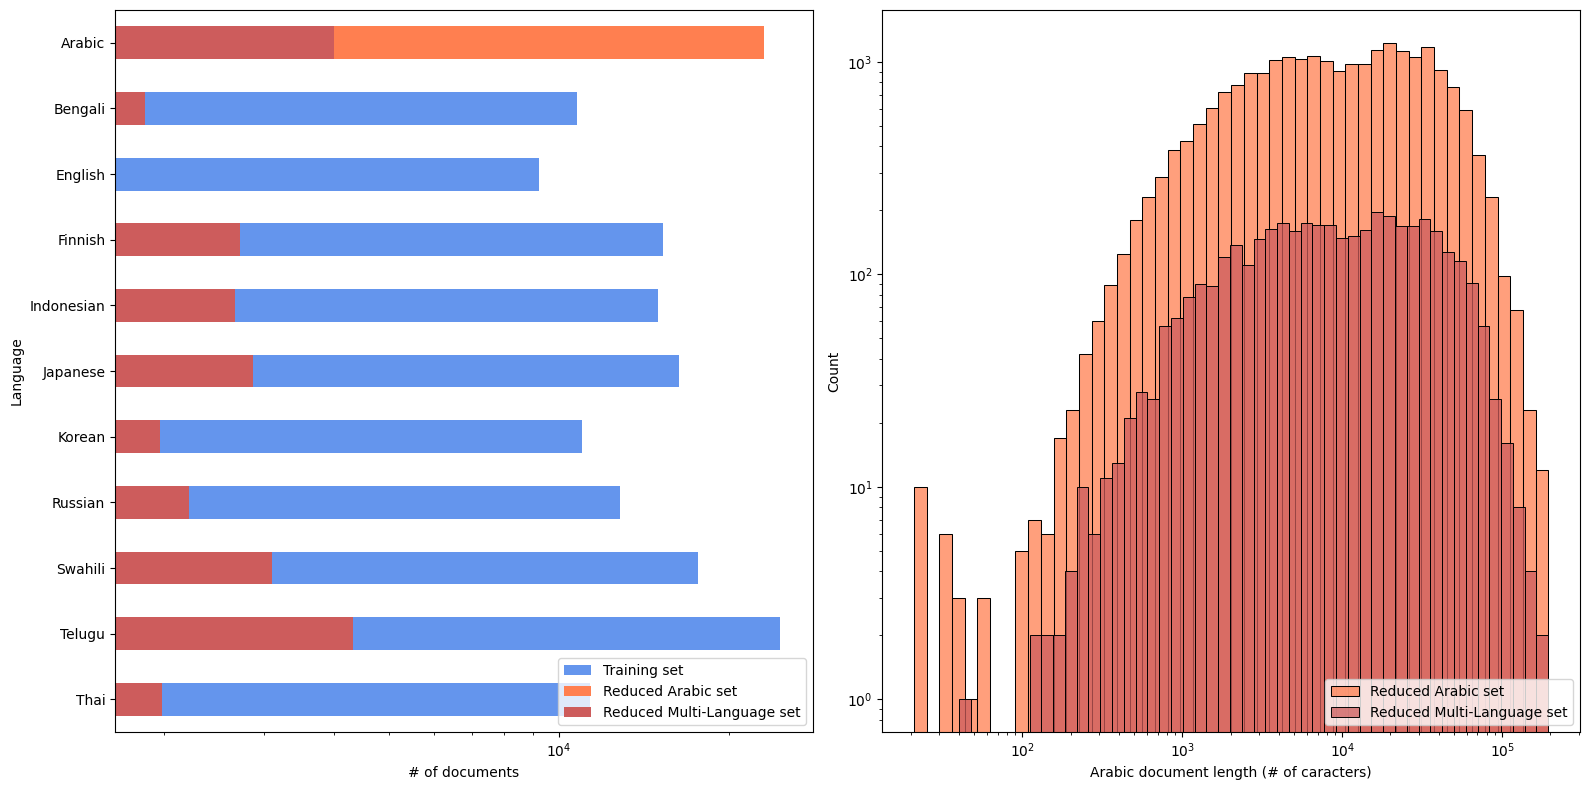

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
a = train_metrics_per_language["count"]
a["Arabic"] = a["Arabic"] - arabic_metrics_per_language["count"]
document_number_metric = pd.DataFrame(
    data=[
        multi_metrics_per_language["count"],
        arabic_metrics_per_language["count"]
        - multi_metrics_per_language["count"]["Arabic"],
        a - multi_metrics_per_language["count"],
    ],
    index=[
        "Reduced Multi-Language set",
        "Reduced Arabic set",
        "Training set",
    ],
).T.sort_values("language", ascending=False)

document_number_metric.plot(
    kind="barh",
    stacked=True,
    color=[
        "indianred",
        "coral",
        "cornflowerblue",
    ],
    ax=axs[0],
)
axs[0].set_xscale("log")
axs[0].set_ylabel("Language")
axs[0].set_xlabel("# of documents")
axs[0].legend()
handles, labels = axs[0].get_legend_handles_labels()
order = [2, 1, 0]
axs[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="lower right") 

# sns.histplot(
#     train_metrics[train_metrics["language"] == "Arabic"],
#     x="document_length",
#     bins=50,
#     ax=axs[1],
#     color="cornflowerblue",
#     log_scale=True,
#     label="Training set",
# )
sns.histplot(
    arabic_metrics,
    x="document_length",
    bins=50,
    ax=axs[1],
    color="coral",
    log_scale=True,
    label="Reduced Arabic set",
)
sns.histplot(
    multi_metrics[multi_metrics["language"] == "Arabic"],
    x="document_length",
    bins=50,
    ax=axs[1],
    color="indianred",
    log_scale=True,
    label="Reduced Multi-Language set",
)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1]
axs[1].legend(loc="lower right") 
axs[1].set_xlabel("Arabic document length (# of caracters)")
axs[1].set_yscale("log")
plt.tight_layout()
plt.savefig("figures/number_documents_length_doc.jpg", dpi=300)


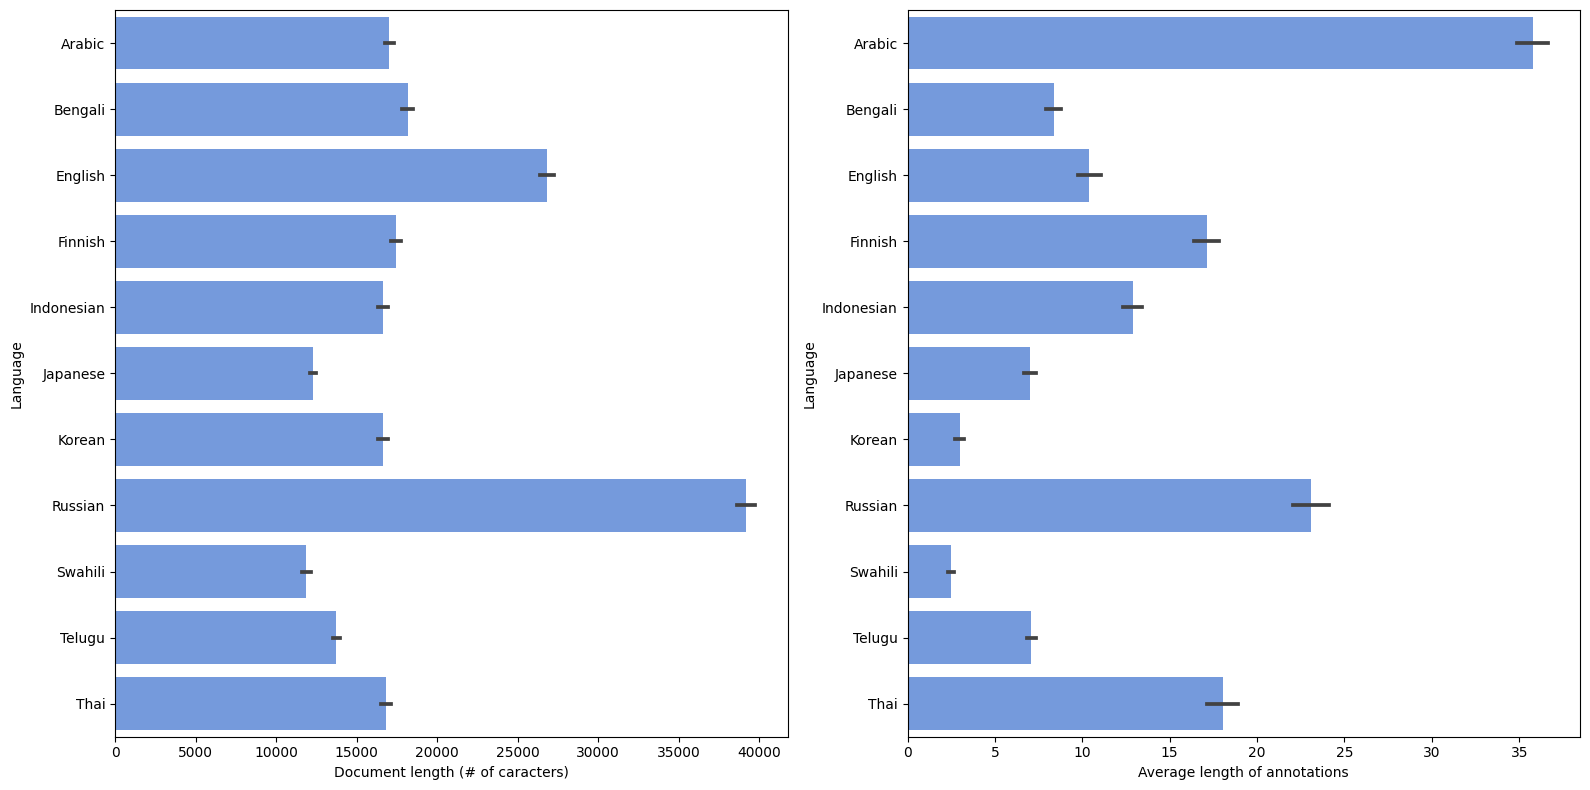

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

ordered_languages = train_metrics_per_language.index.sort_values(ascending=True)

sns.barplot(
    train_metrics,
    x="document_length",
    y="language",
    ax=axs[0],
    color="cornflowerblue",
    order=ordered_languages,
)
axs[0].set_xlabel("Document length (# of caracters)")
axs[0].set_ylabel("Language")
sns.barplot(
    train_metrics,
    x="mean_annotation_answer_candidates",
    y="language",
    ax=axs[1],
    color="cornflowerblue",
    order=ordered_languages,
)
axs[1].set_xlabel("Average length of annotations")
axs[1].set_ylabel("Language")
plt.tight_layout()
plt.savefig("figures/doc_annot_length.jpg", dpi=300)


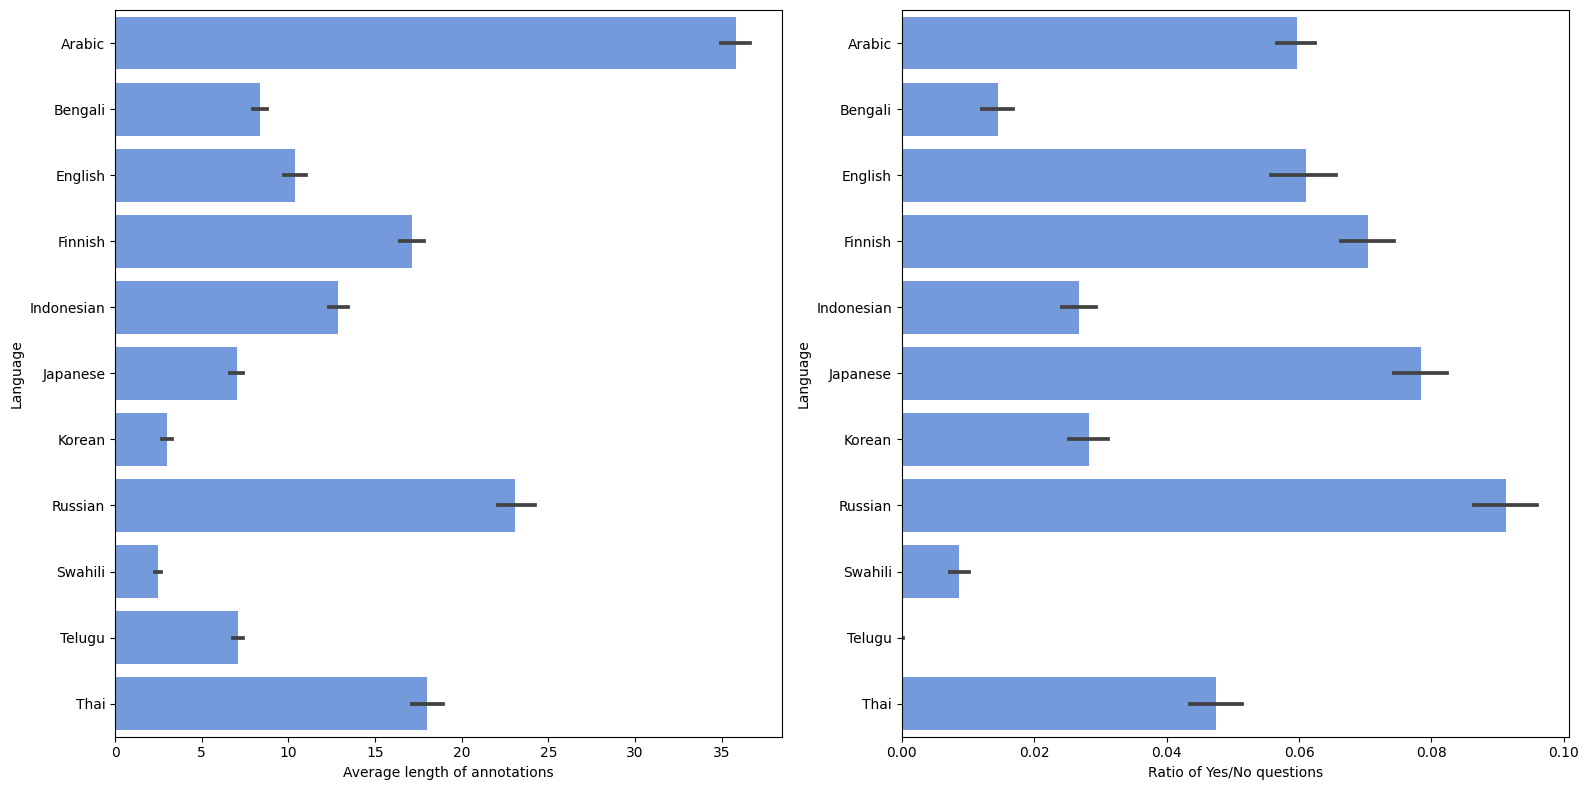

In [226]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(
    train_metrics,
    x="mean_annotation_answer_candidates",
    y="language",
    ax=axs[0],
    color="cornflowerblue",
    order=ordered_languages,
)
axs[0].set_xlabel("Average length of annotations")
axs[0].set_ylabel("Language")
sns.barplot(
    train_metrics,
    x="yes_no_question",
    y="language",
    ax=axs[1],
    color="cornflowerblue",
    order=ordered_languages,
)
axs[1].set_xlabel("Ratio of Yes/No questions")
axs[1].set_ylabel("Language")
plt.tight_layout()
plt.savefig("figures/train_length_ratio_annotations.jpg", dpi=300)


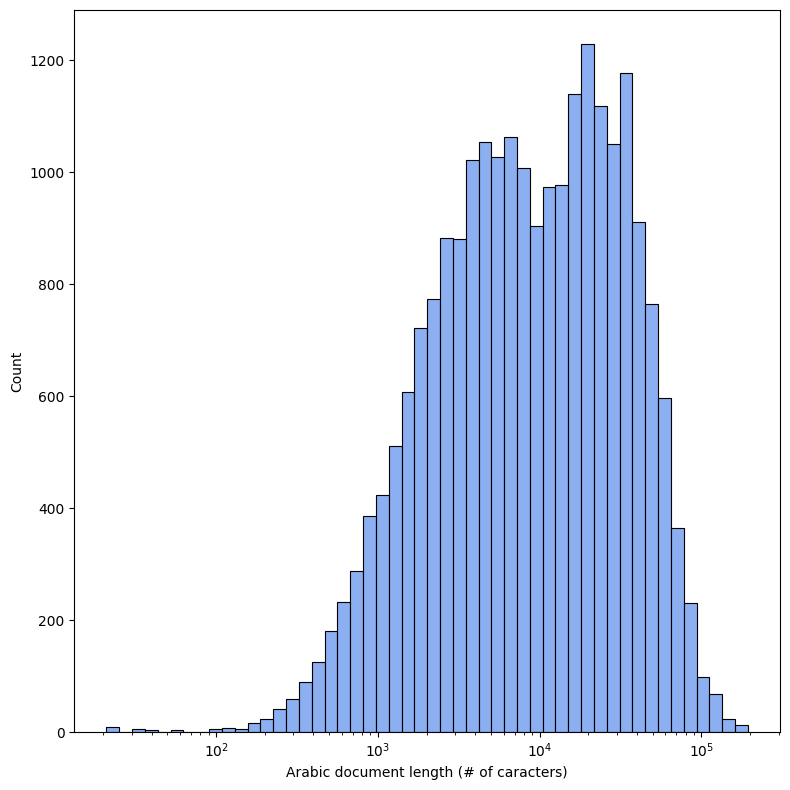

In [242]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

sns.histplot(
    train_metrics[train_metrics["language"] == "Arabic"],
    x="document_length",
    bins=50,
    ax=axs,
    color="cornflowerblue",
    log_scale=True,
)
axs.set_xlabel("Arabic document length (# of caracters)")
# axs.set_ylabel("PDF")
plt.tight_layout()
plt.savefig("figures/hist_arabic_doc_length.jpg", dpi=300)


In [7]:
dataset_path = "train_samples/tydiqa-v1.0-train.jsonl"

with jsonlines.open(dataset_path) as dataset:
    for sample in tqdm(dataset.iter(skip_invalid=True)):
        if sample["language"] == "arabic":
            with jsonlines.open(
                "train_samples/tydiqa-v1.0-train_arabic.jsonl", mode="a"
            ) as writer:
                writer.write(sample)


166916it [01:02, 2668.14it/s]
